# Logistic Regression in Machine Learning

Logistic Regression is a **supervised machine learning algorithm** used for classification problems. 

Unlike linear regression which predicts continuous values it predicts the probability that an input belongs to a specific class.

It is used for binary classification where the output can be one of two possible categories such as 
> Yes/No
> 
> True/False
> 
> 0/1.

It uses sigmoid function to convert inputs into a probability value between 0 and 1. In this article, we will see the basics of logistic regression and its core concepts.

Base for Alogrithms :
> NBC (naive bayes classifier)
>
> KNN (K - Nearest Neighbour)
>
> DT (Decision Tress)
>
> RF (Random Forest)

Steps :
 > Data **->** convert to 0 and 1 **->** log(odds) (to convert data b/w +inf to -inf ) **->** Sigmoid Func **->** (get probability value) 

Sigmoid Function :

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

we convert linear equation into sigmoid function :

$y = mx + c$ $\qquad$ => $\qquad$ $\sigma(\mathbf{x}) = \frac{1}{1 + e^{-\left(m_1 x_1 + m_2 x_2 + m_3 x_3 + \cdots + m_n x_n + b\right)}}$



to calculate $m_1, m_2,m_3....$ need to use MLE(Maximum Likelihood Estimation)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### Dataset

In [2]:
week_data = [1,2,3,4,5]
sales_data = [2,4,5,4,5]

df =  pd.DataFrame({"Week": week_data, "Sales":sales_data})
df

,Week,Sales
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [3]:
''' Divide the data into 2 parts 
1. Independent Variable 
2. Target Varibale
'''

X = df['Week'].values
Y = df['Sales'].values

In [4]:
X

array([1, 2, 3, 4, 5])

In [5]:
Y

array([2, 4, 5, 4, 5])

# Linear Regression

In [6]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
print(mean_x)
print(mean_y)

3.0
4.0


In [7]:
numr = 0
den = 0
for i in range(len(X)):
    numr += (X[i]-mean_x)*(Y[i]-mean_y)
    den += (X[i]-mean_x)**2

m = numr/den # slop
''' 
We know  y = mx + c
so c = y-mx
'''
c = mean_y - m*mean_x

print(m)
print(c)

0.6
2.2


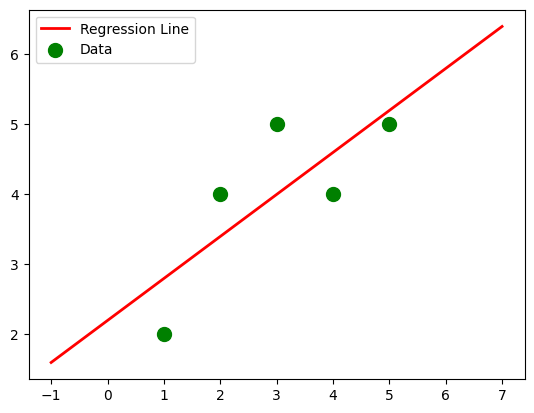

In [8]:
# ploit the line :

max_x = np.max(X) + 2
min_x = np.min(X) - 2


x = np.linspace(min_x, max_x)
y = c + m*x

plt.plot(x, y, color='red', label="Regression Line", linewidth=2)
plt.scatter(X, Y, color='green', label="Data", s=100)
plt.legend(loc='best') 

In [9]:
# R^2

ss_tot = 0
ss_res = 0

for i in range(len(X)):
    y_pred = c + m*X[i]
    ss_tot += (Y[i] - mean_y)**2
    ss_res += (Y[i] - y_pred)**2

r2 = 1 - (ss_res/ss_tot)
r2    

np.float64(0.6000000000000001)

In [10]:
# RMS (Root mean square error)
rmse = 0 
for i in range(len(X)):
    y_pred = c + m*X[i]
    rmse += (y_pred - Y[i])**2

rmse = np.sqrt(rmse/len(X))
rmse

np.float64(0.6928203230275508)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X = X.reshape(len(X),1)
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [13]:
model = LinearRegression()

model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = c + m*X
rmse = mean_squared_error(Y, y_pred)
R2_score = model.score(X,Y)
R2_score

0.6000000000000001

In [15]:
np.sqrt(rmse)

np.float64(0.6928203230275508)

### Real world Dataset

In [16]:
import kagglehub
import os
from sklearn.model_selection import train_test_split

/home/rohan/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
path = kagglehub.dataset_download("anubhabswain/brain-weight-in-humans")
files = os.listdir(path)
df = pd.read_csv(os.path.join(path, "dataset.csv"))
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [18]:
X = df["Head Size(cm^3)"].values
Y = df["Brain Weight(grams)"].values

In [19]:
X = X.reshape(-1,1)

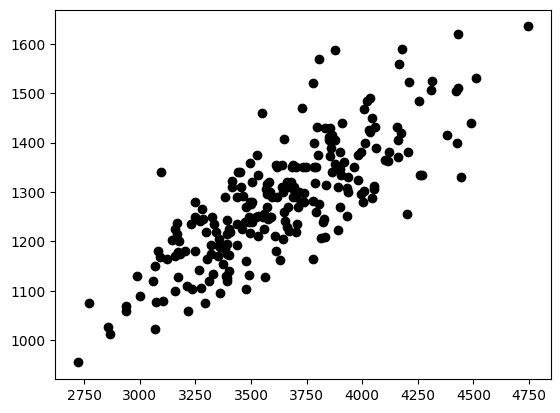

In [20]:
plt.scatter(X,Y, color="black")

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2) 

In [22]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred = lr_model.predict(x_test)
y_pred

array([1232.8973736 , 1448.24747118, 1434.22590463, 1161.73130941,
       1100.08932816, 1578.93905375, 1329.46099229, 1379.99154345,
       1264.64431673, 1250.35819232, 1349.03827389, 1375.7586177 ,
       1223.1087328 , 1224.16696424, 1211.46818698, 1390.30929997,
       1345.86357958, 1326.55085584, 1427.61195815, 1226.01886925,
       1164.64144586, 1250.62275018, 1312.00017357, 1283.95704047,
       1354.59398894, 1272.58105251, 1299.83051204, 1336.86861236,
       1257.76581238, 1191.89090538, 1181.83770672, 1516.76795678,
       1298.50772274, 1356.71045182, 1190.03900037, 1220.99226992,
       1299.03683846, 1158.55661509, 1243.47968797, 1334.75214948,
       1337.66228594, 1236.86574149, 1354.59398894, 1232.63281574,
       1270.7291475 , 1324.96350868, 1269.4063582 , 1187.92253749])

In [24]:
y_test

array([1192, 1485, 1256, 1178, 1070, 1635, 1275, 1296, 1255, 1320, 1357,
       1324, 1220, 1220, 1190, 1422, 1415, 1350, 1420, 1322, 1175, 1280,
       1297, 1163, 1346, 1250, 1305, 1208, 1210, 1246, 1180, 1530, 1355,
       1440, 1105, 1215, 1290, 1100, 1103, 1240, 1315, 1310, 1380, 1290,
       1300, 1318, 1245, 1241])

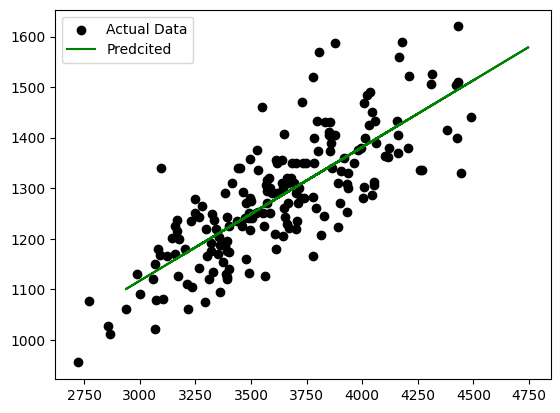

In [25]:
plt.scatter(x_train, y_train, color = 'black', label= "Actual Data")
plt.plot(x_test, y_pred, color = 'green', label="Predcited")
plt.legend()

In [26]:
R2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("r2 Score :",R2_score)
print("RMSE :", rmse)

r2 Score : 0.699877680356205
RMSE : 60.392146418358834


> Generally in Linear regression we check the model is good if RMSE is less
>
> But in Logistic regression we use Confusion matrix

# Logistic Regression

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. DataSet

In [28]:
path = kagglehub.dataset_download("raminhuseyn/hr-analytics-data-set")
files = os.listdir(path)
df = pd.read_csv(os.path.join(path, "HR_capstone_dataset.csv"))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [29]:
df.shape

(14999, 10)

### 2. Analyse the dataset

for best feature to select for our model

In [30]:
'''
For our model we will focus on the attrition  rate of the company  (Employee who left the company)

Select the features which affects the attrition.

lets analyse
think as what can be the factors by which employees might leave the company 
'''

'\nFor our model we will focus on the attrition  rate of the company  (Employee who left the company)\n\nSelect the features which affects the attrition.\n\nlets analyse\nthink as what can be the factors by which employees might leave the company \n'

In [31]:
# attrition

left = df[df.left == 1]
retained = df[df.left==0]
print(f"Total number of employess : {df.shape}")
print(f"No. of employees who left : {left.shape}")
print(f"No. of employees who are in company : {retained.shape}")

Total number of employess : (14999, 10)
No. of employees who left : (3571, 10)
No. of employees who are in company : (11428, 10)


In [32]:
# Probability for employees who left 
left_prob = 3571/14999*100
left_prob 

23.80825388359224

In [33]:
df.groupby("left").mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [34]:
# We can observe :
# satisfaction_level of people who left compared to other employees is low
# No. of project is higher for employees who left
# average_montly_hours is high 
# time_spend_company is high 
# Work_accident is low 
# promotion_last_5years  is very less for employees who left the company.

# We can conclude that this are the factors why employees left the company. There can be other factors as well as we only analyse the numerical data.
# Let's analysis other features as well.

<Axes: xlabel='salary'>

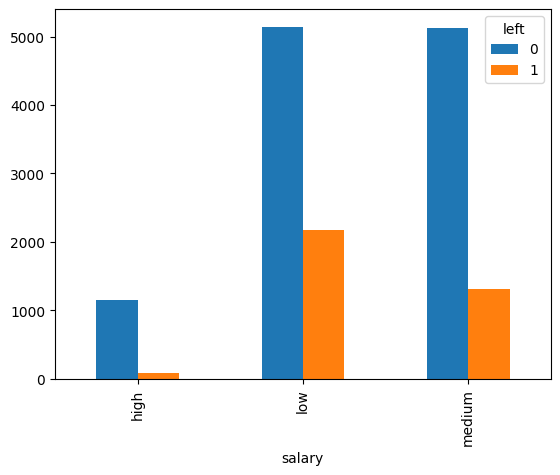

In [35]:
# salary on reteltion

pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='Department'>

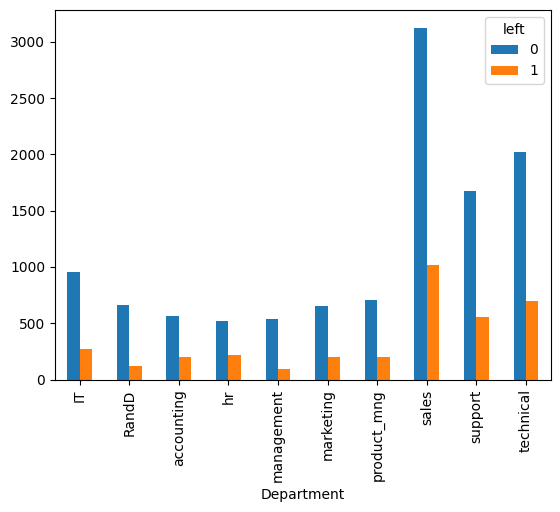

In [36]:
# Analyese the Departmet
pd.crosstab(df.Department, df.left).plot(kind='bar')

In [37]:
# From above we can observe 

# 1. the exployees whos salary is low, left the company most.
# 2. Exployees who belong the Sales Department left the company most

In [38]:
# We will choose most 4 valubale features 
# 1.satisfaction_level 2.time_spend_company 3.promotion_last_5years 4.Salary


subdf = df[['satisfaction_level','time_spend_company','promotion_last_5years','salary']]
subdf

,satisfaction_level,time_spend_company,promotion_last_5years,salary
0,0.38,3,0,low
1,0.80,6,0,medium
2,0.11,4,0,medium
3,0.72,5,0,low
4,0.37,3,0,low
...,...,...,...,...
14994,0.40,3,0,low
14995,0.37,3,0,low
14996,0.37,3,0,low
14997,0.11,4,0,low


In [39]:
# Now cant directly put this data into machine learnig as Salary is a string type.
# we have to convert the string into numberical value.
# we will use encoding technique.

In [40]:

'''
    For this we will use one_hot_encoding
    Salary has three values 
    1. low     0
    2. medium  1
    3. high   2
    # this will cause weighted issue so we will use one hot encoding


    in one hot encoding values will become 

    1. low     001
    2. medium  010
    3. high    100
'''

'\n    For this we will use one_hot_encoding\n    Salary has three values \n    1. low     0\n    2. medium  1\n    3. high   2\n    # this will cause weighted issue so we will use one hot encoding\n\n\n    in one hot encoding values will become \n\n    1. low     001\n    2. medium  010\n    3. high    100\n'

In [41]:
salary_dummies = pd.get_dummies(subdf.salary, prefix='salary').astype(int)
salary_dummies.head(5)

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [42]:
df_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')
df_with_dummies.head(5)

,satisfaction_level,time_spend_company,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,3,0,low,0,1,0
1,0.80,6,0,medium,0,0,1
2,0.11,4,0,medium,0,0,1
3,0.72,5,0,low,0,1,0
4,0.37,3,0,low,0,1,0


In [43]:
# now remove the unwanted column salary (as we already have converted the to numberical value)

df_with_dummies.drop('salary', axis='columns', inplace= True)
df_with_dummies.head(5)

,satisfaction_level,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,3,0,0,1,0
1,0.80,6,0,0,0,1
2,0.11,4,0,0,0,1
3,0.72,5,0,0,1,0
4,0.37,3,0,0,1,0


In [44]:
# Lets devide this into X(Features) and Y(Target) form
x = df_with_dummies
y = df.left

In [45]:
x.head(5)

,satisfaction_level,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,3,0,0,1,0
1,0.80,6,0,0,0,1
2,0.11,4,0,0,0,1
3,0.72,5,0,0,1,0
4,0.37,3,0,0,1,0


In [46]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### model to impliment

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [49]:
model1 = LogisticRegression()

In [50]:
model1.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [51]:
# Lets test the mode 

In [52]:
x_test[20:21]

,satisfaction_level,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
4572,0.67,3,0,0,0,1


In [53]:
y_test[23:30]

1621     1
1578     1
5503     0
4841     0
13351    0
13884    0
6613     0
Name: left, dtype: int64

In [56]:
model1.predict(x_test[23:30])

array([0, 1, 0, 0, 0, 0, 0])

In [57]:
model1.predict_proba(x_test[23:30])

array([[0.91002898, 0.08997102],
       [0.24400481, 0.75599519],
       [0.78006358, 0.21993642],
       [0.80156953, 0.19843047],
       [0.94229393, 0.05770607],
       [0.98471339, 0.01528661],
       [0.91289649, 0.08710351]])

In [58]:
model1.score(x_test, y_test)

0.7773333333333333

In [59]:
y_pred = model1.predict(x_test)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2293
           1       0.56      0.26      0.35       707

    accuracy                           0.78      3000
   macro avg       0.68      0.60      0.61      3000
weighted avg       0.75      0.78      0.74      3000



In [61]:
'''
Since accuracy is good almost 78% 
but a issue still persist.
for this dataset we are more focused why employeer are leaving the company.
but for our mode as show above report, we can observe that 
for 0 (employees who are still working in company) its precision and recall is good, but
1 (employees  who left the company) its precision and recall is bad.
and from our understanding this model is mode not good to predict why people are leaving the company.
'''

'\nSince accuracy is good almost 78% \nbut a issue still persist.\nfor this dataset we are more focused why employeer are leaving the company.\nbut for our mode as show above report, we can observe that \nfor 0 (employees who are still working in company) its precision and recall is good, but\n1 (employees  who left the company) its precision and recall is bad.\nand from our understanding this model is mode not good to predict why people are leaving the company.\n'

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve

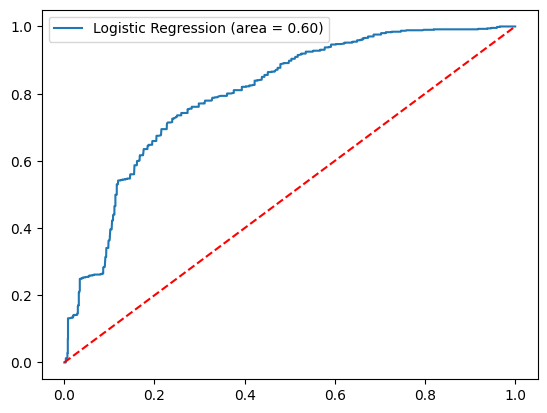

In [63]:
logreg_roc_auc_score = roc_auc_score(y_test, model1.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, model1.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %.2f)' % logreg_roc_auc_score)
plt.plot([0,1],[0,1], 'r--')
plt.legend(loc='best')

In [64]:
logreg_roc_auc_score

0.5980201720876093

#### fine tune our mode 

In [65]:
# since we want our mode to predict the employees who left. as we have observed that 
# number of employees left < number of employees work

##### 1. Re-train with class_weight='balanced'

It tells the algorithm to automatically adjusts the importance of each class during training by computing weights as:

$$
\text{weight}_c = \frac{n_{\text{samples}}}{n_{\text{classes}} \times n_c}
$$

Where:

- $n_{\text{samples}}$ : Total number of samples
- $n_{\text{classes}}$ : Number of unique classes
- $n_c$ : Number of samples in class $c$


In [66]:
model2 = LogisticRegression(class_weight='balanced', random_state=42)
model2.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [67]:
y_pred = model2.predict(x_test)

In [68]:
model2.score(x_test, y_test)

0.7596666666666667

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2293
           1       0.49      0.76      0.60       707

    accuracy                           0.76      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.76      0.77      3000



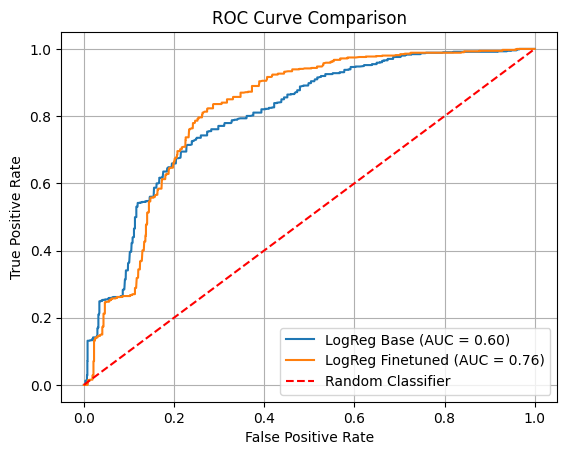

In [70]:
logreg_roc_auc_score1 = roc_auc_score(y_test, model1.predict(x_test))
logreg_roc_auc_score2 = roc_auc_score(y_test, model2.predict(x_test))

fpr1, tpr1, _ = roc_curve(y_test, model1.predict_proba(x_test)[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, model2.predict_proba(x_test)[:, 1])

plt.figure()
plt.plot(fpr1, tpr1, label='LogReg Base (AUC = %.2f)' % logreg_roc_auc_score1)
plt.plot(fpr2, tpr2, label='LogReg Finetuned (AUC = %.2f)' % logreg_roc_auc_score2)
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.grid()
plt.show()


### Observation: Logistic Regression on Employee Attrition

We trained two Logistic Regression models:

1. **Model 1:** Default parameters (no tuning)
2. **Model 2:** With `class_weight='balanced'` to handle class imbalance

---

### ROC Curve Results

- **Model 1 AUC:** ~0.60 — poor at identifying employees who leave
- **Model 2 AUC:** **0.75** — much better performance for the minority class

---

### Improvment can be done

- Use **class balancing** (done in Model 2)
- Apply **threshold tuning** (e.g., set threshold = 0.3)
- Try **SMOTE** or more powerful models (Random Forest, XGBoost)

---

### Conclusion

Model 2 gives better results for predicting employee attrition. Further tuning and oversampling can improve it even more.
